In [1]:
import sys, os

In [2]:
sys.path.extend([os.path.abspath('../../../../')])

# Recovering the result of De Cruz, Demaeyer and Vannitsem (2016)

In this example, we recover the attractor shown in

* De Cruz, L., Demaeyer, J. and Vannitsem, S. (2016). *The Modular Arbitrary-Order Ocean-Atmosphere Model: MAOOAM v1.0*, Geosci. Model Dev., **9**, 2793-2808. [doi:10.5194/gmd-9-2793-2016](https://doi.org/10.5194/gmd-9-2793-2016)

obtained with a 2-layer channel QG atmosphere truncated at wavenumber 2 coupled, both by friction and heat exchange, to a shallow water ocean with 8 modes. 


## Modules import

First, setting the path and loading of some modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initializing the random number generator (for reproducibility). -- Disable if needed.

In [4]:
np.random.seed(21217)

Importing the model's modules

In [5]:
from params.params import QgParams
from integrators.integrator import RungeKuttaIntegrator
from functions.tendencies import create_tendencies

## Systems definition

General parameters

In [6]:
# Time parameters
dt = 0.1
# Saving the model state n steps
write_steps = 10

number_of_trajectories = 1

Setting some model parameters

In [7]:
# Model parameters instantiation with some non-default specs
model_parameters = QgParams()

# Mode truncation at the wavenumber 2 in both x and y spatial
# coordinates for the atmosphere
model_parameters.set_max_atmospheric_modes(2, 2)
# Mode truncation at the wavenumber 2 in the x and at the 
# wavenumber 4 in the y spatial coordinates for the ocean
model_parameters.set_max_oceanic_modes(2, 4)

In [8]:
# Setting MAOOAM parameters according to the publication linked above
model_parameters.set_params({'kd': 0.0290, 'kdp': 0.0290, 'n': 1.5, 'r': 1.e-7,
                             'h': 136.5, 'd': 1.1e-7})
model_parameters.atemperature_params.set_params({'eps': 0.7, 'T0': 289.3,
                                                 'hlambda': 15.06})
model_parameters.otemperature_params.set_params({'gamma': 5.6e8, 'T0': 301.46})

Setting the short-wave radiation component as in the publication above: $C_{\text{a},1}$ and $C_{\text{o},1}$ 


In [9]:
model_parameters.atemperature_params.set_C(103.3333, 0)
model_parameters.otemperature_params.set_C(310, 0)

Printing the model's parameters

In [10]:
model_parameters.print_params()

Qgs parameters summary

General Parameters:
'time_unit': days,
'rr': 287.058  [J][kg^-1][K^-1]  (gas constant of dry air),
'sb': 5.67e-08  [J][m^-2][s^-1][K^-4]  (Stefan-Boltzmann constant),

Scale Parameters:
'scale': 5000000.0  [m]  (characteristic space scale (L*pi)),
'f0': 0.0001032  [s^-1]  (Coriolis parameter at the middle of the domain),
'n': 1.5    (aspect ratio (n = 2 L_y / L_x)),
'rra': 6370000.0  [m]  (earth radius),
'phi0_npi': 0.25    (latitude exprimed in fraction of pi),
'deltap': 50000.0  [Pa]  (pressure difference between the two atmospheric layers),

Atmospheric Parameters:
'kd': 0.029  [nondim]  (atmosphere bottom friction coefficient),
'kdp': 0.029  [nondim]  (atmosphere internal friction coefficient),
'sigma': 0.2  [nondim]  (static stability of the atmosphere),

Atmospheric Temperature Parameters:
'gamma': 10000000.0  [J][m^-2][K^-1]  (specific heat capacity of the atmosphere),
'C[1]': 103.3333  [W][m^-2]  (component 1 of the short-wave radiation of the atmosphere

Creating the tendencies function

In [11]:
f, Df = create_tendencies(model_parameters)

## Time integration and plotting a section of the attractor

Defining an integrator

In [12]:
integrator = RungeKuttaIntegrator()
integrator.set_func(f)

Start on a random initial condition and integrate over a transient time to obtain an initial condition on the attractors (may take several minutes)

In [13]:
## Might take several minutes, depending on your cpu computational power.
ic = np.random.rand(model_parameters.ndim)*0.01
integrator.integrate(0., 10000000., dt, ic=ic, write_steps=0)
time, ic = integrator.get_trajectories()

Now integrate to obtain a trajectory on the attractor

In [14]:
integrator.integrate(0., 1000000., dt, ic=ic, write_steps=write_steps)
time, traj = integrator.get_trajectories()

and plot $\psi_1^{\rm a}$, $\psi_2^{\rm o}$ and $\theta_2^{\rm o}$

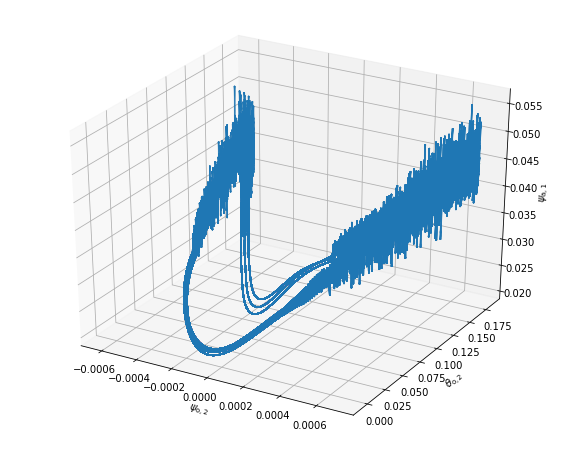

In [15]:
fig = plt.figure(figsize=(10, 8))
axi = fig.gca(projection='3d')

axi.scatter(traj[21], traj[29], traj[0], s=0.2);

axi.set_xlabel('$'+model_parameters.latex_var_string[21]+'$')
axi.set_ylabel('$'+model_parameters.latex_var_string[29]+'$')
axi.set_zlabel('$'+model_parameters.latex_var_string[0]+'$');

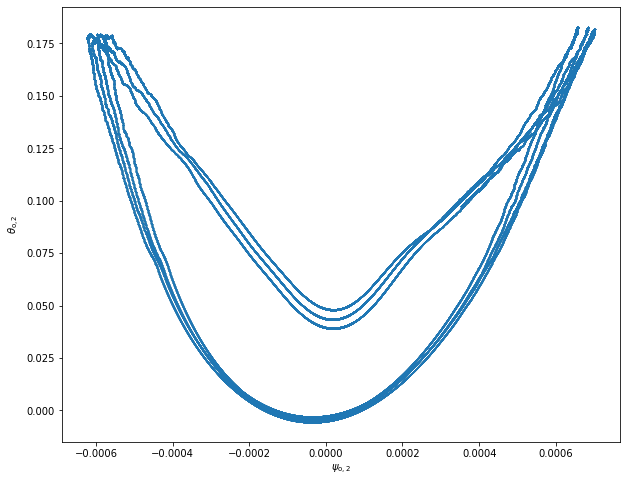

In [16]:
varx = 21
vary = 29
plt.figure(figsize=(10, 8))

plt.plot(traj[varx], traj[vary], marker='o', ms=0.1, ls='')

plt.xlabel('$'+model_parameters.latex_var_string[varx]+'$')
plt.ylabel('$'+model_parameters.latex_var_string[vary]+'$');